In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
pd.options.mode.chained_assignment = None  # default='warn'
from datetime import datetime
from operator import itemgetter
from itertools import groupby
import collections

In [ ]:
#import dataset
pt = pd.read_csv('mall_pt/csv/providers.csv', sep=',')

In [ ]:
pt.head()

In [5]:
#exploring dataset
pt.shape

(2057399, 5)

In [6]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057399 entries, 0 to 2057398
Data columns (total 5 columns):
tracking_id      int64
date             object
status           object
mapped_status    object
provider         object
dtypes: int64(1), object(4)
memory usage: 78.5+ MB


In [7]:
pt.describe()

,tracking_id
count,2.057399e+06
mean,6.625531e+05
std,3.316196e+05
min,5.301900e+04
25%,4.302200e+05
50%,4.372770e+05
75%,9.619490e+05
max,1.403023e+06


In [8]:
pt.isnull().sum()

tracking_id          0
date                60
status              60
mapped_status    34867
provider             0
dtype: int64

In [ ]:
#find empty dates
pt[pt["date"].isnull() == True]

In [10]:
len(pt[pt["date"].isnull() == True])

60

In [11]:
#remove rows with empty date
pt = pt.dropna(subset=['date'], how='all')

In [12]:
len(pt[pt["date"].isnull() == True])

0

In [13]:
#convert date to our datetime format
def update_date(date):
    new_date = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    return new_date

In [14]:
clean_pt = pt.copy(deep = True)

In [15]:
clean_pt.head(3)

,tracking_id,date,status,mapped_status,provider
0,1363206,2017-12-13 16:29:27,Balíček jsme úspěšně doručili,Doručeno,dpd
1,1363207,2017-12-13 13:38:48,Balíček jsme úspěšně doručili,Doručeno,dpd
2,1363208,2017-12-13 12:08:33,Balíček jsme úspěšně doručili,Doručeno,dpd


In [16]:
clean_pt["date"] = clean_pt["date"].apply(update_date)

In [17]:
clean_pt.head()

,tracking_id,date,status,mapped_status,provider
0,1363206,2017-12-13 16:29:27,Balíček jsme úspěšně doručili,Doručeno,dpd
1,1363207,2017-12-13 13:38:48,Balíček jsme úspěšně doručili,Doručeno,dpd
2,1363208,2017-12-13 12:08:33,Balíček jsme úspěšně doručili,Doručeno,dpd
3,1363209,2017-12-13 14:06:00,Balíček jsme úspěšně doručili,Doručeno,dpd
4,1363210,2017-12-13 15:14:08,Balíček jsme úspěšně doručili,Doručeno,dpd


In [18]:
clean_pt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057339 entries, 0 to 2057398
Data columns (total 5 columns):
tracking_id      int64
date             datetime64[ns]
status           object
mapped_status    object
provider         object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 94.2+ MB


In [19]:
tracking_id = clean_pt[["tracking_id"]].groupby(clean_pt["tracking_id"]).count().sort_values(by='tracking_id', ascending=False)

In [ ]:
tracking_id

In [21]:
#remove duplicates
no_pt_dup = clean_pt.drop_duplicates(['tracking_id', 'date', 'status'], inplace=False)

In [ ]:
no_pt_dup.sort_values(by='tracking_id')

In [23]:
tracking_id_no_dup = no_pt_dup[["tracking_id"]].groupby(no_pt_dup["tracking_id"]).count().sort_values(by='tracking_id', ascending=False)

In [24]:
tracking_id_1 = tracking_id_no_dup[tracking_id_no_dup["tracking_id"].values == 1]

In [25]:
tracking_id_no_dup["tracking_id"].values

array([82, 81, 77, ...,  1,  1,  1])

In [26]:
tracking_id_1.to_csv('mall_pt/csv/1_state.csv', encoding='utf-8')

In [27]:
tracking_id_no_dup = tracking_id_no_dup[tracking_id_no_dup["tracking_id"].values > 1]

In [ ]:
tracking_id_no_dup

In [29]:
tracking_id_no_dup.to_csv('mall_pt/csv/duplicate_ids.csv', encoding='utf-8')

In [30]:
tracking_id_same_status = no_pt_dup[["status"]].groupby([no_pt_dup["status"], no_pt_dup["tracking_id"], no_pt_dup["provider"]]).count()

In [31]:
same_statuses = tracking_id_same_status[tracking_id_same_status["status"] > 1]

In [ ]:
same_statuses

In [33]:
same_statuses.to_csv('mall_pt/csv/same_statuses.csv', encoding='utf-8')

In [34]:
full_dup_per_id = no_pt_dup[no_pt_dup["tracking_id"] == 1294084]

In [35]:
full_dup_per_id.head()

,tracking_id,date,status,mapped_status,provider
1951769,1294084,2017-12-12 17:51:30,Převážení/vážení,Převzato dopravcem,ppl
1951770,1294084,2017-12-13 16:10:09,Příjem na centrálu,Převzato dopravcem,ppl
1951771,1294084,2017-12-13 16:11:05,Příjem na centrálu,Převzato dopravcem,ppl
1951772,1294084,2017-12-13 16:11:39,Příjem na centrálu,Převzato dopravcem,ppl
1951773,1294084,2017-12-13 16:12:35,Příjem na centrálu,Převzato dopravcem,ppl


In [36]:
full_dup_per_id.to_csv('mall_pt/csv/duplicates_example.csv', sep=',', encoding='utf-8')

In [37]:
all_dup = no_pt_dup[no_pt_dup["tracking_id"].isin(tracking_id_no_dup["tracking_id"].index)]

In [38]:
all_dup.shape

(268551, 5)

In [39]:
no_pt_dup.shape

(659370, 5)

In [40]:
all_dup1 = all_dup.sort_values(by='tracking_id')

In [41]:
all_dup1.to_csv('mall_pt/csv/duplicates_detail.csv', sep=',', encoding='utf-8', index=False)

In [42]:
no_pt_dup.head()

,tracking_id,date,status,mapped_status,provider
0,1363206,2017-12-13 16:29:27,Balíček jsme úspěšně doručili,Doručeno,dpd
1,1363207,2017-12-13 13:38:48,Balíček jsme úspěšně doručili,Doručeno,dpd
2,1363208,2017-12-13 12:08:33,Balíček jsme úspěšně doručili,Doručeno,dpd
3,1363209,2017-12-13 14:06:00,Balíček jsme úspěšně doručili,Doručeno,dpd
4,1363210,2017-12-13 15:14:08,Balíček jsme úspěšně doručili,Doručeno,dpd


In [43]:
#- najvyuzivanejsi dopravca
most_common_provider = no_pt_dup["provider"].groupby([no_pt_dup["provider"]]).count().sort_values(ascending=False)

In [44]:
most_common_provider

provider
intime             422669
ppl                109325
ceskaposta          45982
raben               44902
gebruderweiss       17724
ulozenka            14394
toptrans             2020
geis                 1751
zavolejsikuryra       495
dpd                   108
Name: provider, dtype: int64

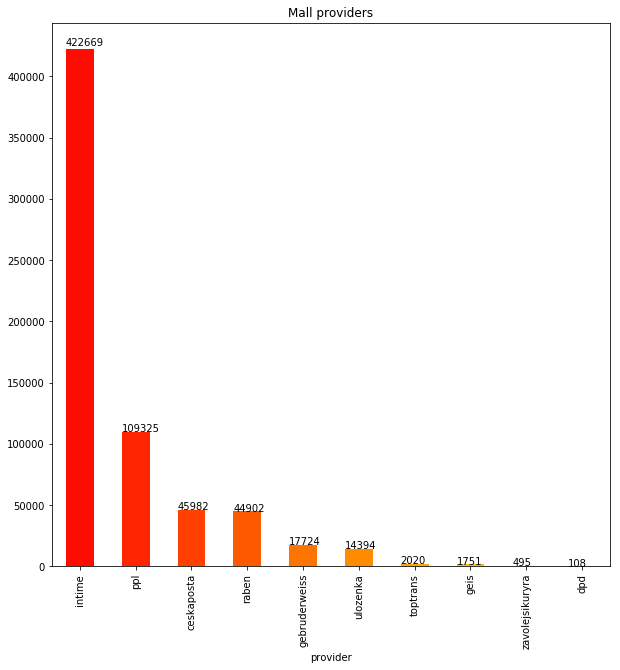

In [45]:
import matplotlib.cm as cm  


type_colors = cm.autumn(np.linspace(0.05,0.95,len(most_common_provider)))
ax = most_common_provider.plot.bar(color=type_colors, title='Mall providers', figsize=(10,10))
ax.set_xlabel = 'Providers'
ax.set_ylabel = 'Number of deliveries'
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.005))

In [46]:
fig = ax.get_figure()
fig.savefig('mall_pt/csv/providers.png')

In [47]:
delivered = no_pt_dup[no_pt_dup["mapped_status"] == "Doručeno"]

In [48]:
delivered.shape

(112669, 5)

In [49]:
delivered.head()

,tracking_id,date,status,mapped_status,provider
0,1363206,2017-12-13 16:29:27,Balíček jsme úspěšně doručili,Doručeno,dpd
1,1363207,2017-12-13 13:38:48,Balíček jsme úspěšně doručili,Doručeno,dpd
2,1363208,2017-12-13 12:08:33,Balíček jsme úspěšně doručili,Doručeno,dpd
3,1363209,2017-12-13 14:06:00,Balíček jsme úspěšně doručili,Doručeno,dpd
4,1363210,2017-12-13 15:14:08,Balíček jsme úspěšně doručili,Doručeno,dpd


In [50]:
most_common_provider_delivered = delivered["provider"].groupby([delivered["provider"]]).count().sort_values(ascending=False)

In [51]:
most_common_provider_delivered

provider
intime             60951
ppl                16977
ceskaposta         14612
raben               9697
gebruderweiss       8191
ulozenka            1756
toptrans             257
dpd                  108
geis                  66
zavolejsikuryra       54
Name: provider, dtype: int64

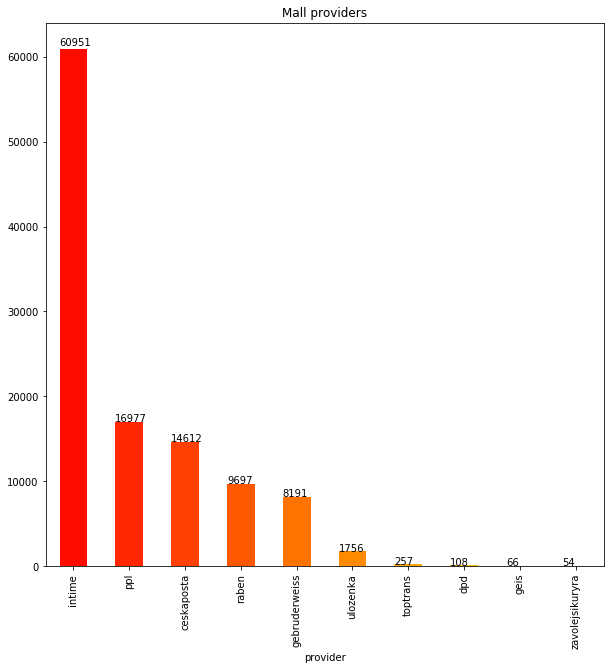

In [52]:
type_colors = cm.autumn(np.linspace(0.05,0.95,len(most_common_provider_delivered)))
ax = most_common_provider_delivered.plot.bar(color=type_colors, title='Mall providers', figsize=(10,10))
ax.set_xlabel = 'Providers'
ax.set_ylabel = 'Number of deliveries'
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.005))

In [53]:
fig1 = ax.get_figure()
fig1.savefig('mall_pt/csv/providers_delivered.png')

In [54]:
cancelled = no_pt_dup[no_pt_dup["mapped_status"] == "Stornováno"]

In [55]:
cancelled.head()

,tracking_id,date,status,mapped_status,provider
4374,424312,2017-11-30 10:24:52,Stornováno,Stornováno,intime
4375,424295,2017-11-30 10:26:18,Stornováno,Stornováno,intime
4376,424315,2017-11-30 10:26:41,Stornováno,Stornováno,intime
4377,424311,2017-11-30 10:27:15,Stornováno,Stornováno,intime
4378,424298,2017-11-30 10:27:36,Stornováno,Stornováno,intime


In [56]:
cancelled_count = cancelled["provider"].groupby([cancelled["provider"]]).count()

In [57]:
cancelled_count = cancelled_count.to_frame()

In [58]:
cancelled_count = cancelled_count.rename(columns = {'provider' : 'n_c'})

In [59]:
cancelled_count

,n_c
provider,
ceskaposta,2471
gebruderweiss,522
geis,32
intime,594
ppl,392
ulozenka,125
zavolejsikuryra,21


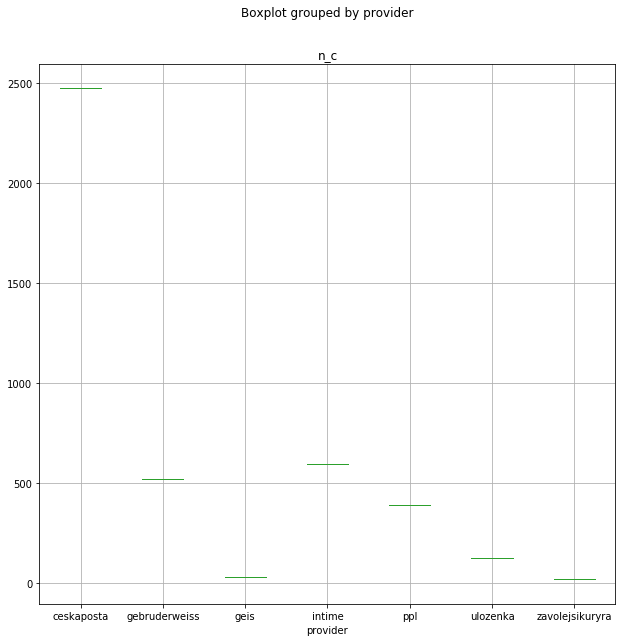

In [60]:
bx = cancelled_count.boxplot(column='n_c', by='provider', figsize = (10,10))

In [61]:
fig2 = bx.get_figure()
fig2.savefig('mall_pt/csv/providers_cancelled.png')

In [62]:
delivered['date'].sort_values(ascending=True).head()

392266   1899-12-30 11:13:46
426400   2017-09-15 12:28:05
426452   2017-09-15 12:28:05
428480   2017-09-15 13:42:58
428532   2017-09-15 13:42:58
Name: date, dtype: datetime64[ns]

In [63]:
delivered_last_month = delivered.loc[delivered.date > '2017-12-01 08:00:00']

In [ ]:
delivered_last_month

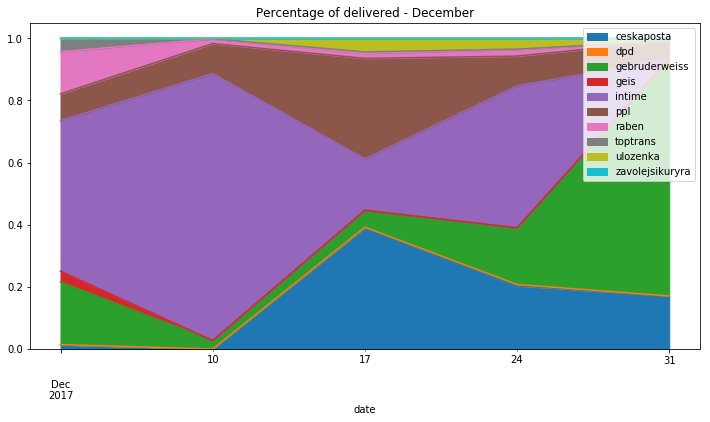

In [65]:
cx = delivered_last_month.groupby([pd.Grouper(key='date', freq='W'), 'provider']) \
  .size() \
  .unstack('provider', fill_value=0) \
  .pipe(lambda x: x.div(x.sum(1), axis=0)) \
  .plot(kind='area', figsize=(12,6), title='Percentage of delivered - December') \
  .legend(loc='upper right')

In [66]:
fig3 = cx.get_figure()
fig3.savefig('mall_pt/csv/december.png')

In [104]:
providers_grouped = no_pt_dup[["tracking_id", "provider", "status", "mapped_status", "date"]].sort_values(by=['date']).groupby(
    [no_pt_dup["tracking_id"], no_pt_dup["date"]])

In [105]:
providers_grouped.tail()[0:10]

,tracking_id,provider,status,mapped_status,date
392266,1112829,intime,Doručeno,Doručeno,1899-12-30 11:13:46
2053357,1365496,ceskaposta,pořízeno na pochůzku,Na cestě k příjemci,1970-01-01 11:33:37
425204,427198,raben,Naloženo z depa (na line haul),Na cestě k příjemci,2017-09-15 08:05:00
425308,427199,raben,Naloženo z depa (na line haul),Na cestě k příjemci,2017-09-15 08:05:00
425412,427200,raben,Naloženo z depa (na line haul),Na cestě k příjemci,2017-09-15 08:05:00
424996,427196,raben,Naloženo z depa (na line haul),Na cestě k příjemci,2017-09-15 08:24:00
425100,427197,raben,Naloženo z depa (na line haul),Na cestě k příjemci,2017-09-15 08:24:00
424892,427195,raben,Naloženo z depa (na line haul),Na cestě k příjemci,2017-09-15 08:24:00
425620,427202,raben,Naloženo z depa (na line haul),Na cestě k příjemci,2017-09-15 11:52:00
425516,427201,raben,Naloženo z depa (na line haul),Na cestě k příjemci,2017-09-15 11:52:00


In [69]:
new_df = providers_grouped.head().sort_values(by=['provider', 'tracking_id', 'date'])

In [70]:
new_df[new_df['tracking_id'] == 53019]

,tracking_id,provider,status,mapped_status,date
416436,53019,intime,Výdej na kurýra,Převzato dopravcem,2017-12-20 02:00:00
421200,53019,intime,Výdej na kurýra,Převzato dopravcem,2017-12-20 18:08:00
421759,53019,intime,Výdej na kurýra,Převzato dopravcem,2017-12-21 02:00:00
422906,53019,intime,Na cestě k příjemci,Na cestě k příjemci,2017-12-21 08:53:10
423324,53019,intime,Stornováno,Stornováno,2017-12-21 10:05:20


In [71]:
cp_dict = {}
intime_dict = {}
ppl_dict = {}
dpd_dict = {}
gw_dict = {}
geis_dict = {}
raben_dict = {}
ulozenka_dict = {}
kuryr_dict = {}
toptrans_dict = {}
uni = {}

In [273]:
temp_arr = []
c = 0

In [ ]:
for index, group in providers_grouped:
    temp_arr.append([group.mapped_status.values[0], group.provider.values[0], group.tracking_id.values[0]])

In [276]:
d = collections.defaultdict(list)

In [168]:
for k, v in temp_arr:
    d[v].append(k)

In [170]:
new = sorted(d.items())

In [171]:
for i,j in new[0:2]:
    print (i,j)

53019 ['Převzato dopravcem', 'Převzato dopravcem', 'Převzato dopravcem', 'Na cestě k příjemci', 'Stornováno']
56307 ['Převzato dopravcem', 'Na cestě k příjemci', 'Stornováno']


In [172]:
for i,j in new:
    cp_dict[i] = j

In [174]:
len(cp_dict)

450562

In [175]:
default = ['Převzato dopravcem', 'Na cestě k příjemci', 'Doručeno', 'Stornováno']

In [262]:
message = []

In [177]:
dicts1 = [cp_dict, intime_dict, ppl_dict, dpd_dict, gw_dict, geis_dict, raben_dict, ulozenka_dict,
         kuryr_dict, toptrans_dict]

In [ ]:
def remove_nan(adict):
    for j, i in adict.items():
        for h in i:
            if type(h) == float:
                np.delete(i, h)

In [263]:
def check1(dict):
    c = 0
    for j, i in dict.items():
        status_count = 0
        for k in i:
            
            temp_len = len(i)
            
            if k == 'Doručeno' or k == 'Stornováno':

                if status_count == temp_len-1:
                    message.append(['Final state', j, k])
            status_count +=1
            
        if 'Převzato dopravcem' not in i and 'Na cestě k příjemci' in i:

            message.append(['Missing Převzato dopravcem state', j, k])
        if default not in i and status_count == temp_len-1:

            message.append(['Missing expected statuses', j, i])

        if 'Doručeno' in i or 'Stornováno' in i:

            if i[-1] not in ['Doručeno', 'Stornováno']:
                message.append(["New status after final", j, i])
            
                

In [264]:
check1(cp_dict)

In [822]:
check1(kuryr_dict, 'zavolejsikuryra')

In [265]:
t = pd.DataFrame(message)

In [266]:
t[t[0] == 'New status after final'].head()

,0,1,2
1353,New status after final,274189,"[Na cestě k příjemci, Stornováno, Na cestě k p..."
1374,New status after final,280861,"[Na cestě k příjemci, Stornováno, Na cestě k p..."
1428,New status after final,283417,"[Na cestě k příjemci, Stornováno, Na cestě k p..."
2669,New status after final,391816,"[Doručeno, Převzato dopravcem]"
2797,New status after final,415620,"[Převzato dopravcem, nan, Na cestě k příjemci,..."


In [267]:
t = t.rename(columns={0 : 'message', 1 : 'tracking_id', 2 : 'detail'})

In [268]:
t.head()

,message,tracking_id,detail
0,Final state,53019,Stornováno
1,Final state,56307,Stornováno
2,Final state,113225,Doručeno
3,Missing Převzato dopravcem state,113225,Doručeno
4,Final state,113226,Doručeno


In [269]:
t.shape

(232799, 3)

In [270]:
t_state = t[["message"]].groupby([t["message"]]).count().sort_values(by='message', ascending=False)

In [271]:
t_state.head()

,message
message,
Missing Převzato dopravcem state,118535
Final state,104228
New status after final,10036


In [272]:
t.sort_values(by='message').to_csv('mall_pt/csv/all.csv', encoding='utf-8', index=False)

In [985]:
t_state1 = t[["provider", "message"]].groupby([t["message"], t["provider"]]).count().sort_values(by='message', ascending=False)

In [986]:
t_state1.to_csv('mall_pt/csv/allg.csv', encoding='utf-8', index=True)

In [987]:
t_state1

,,provider,message
message,provider,,
Missing Převzato dopravcem state,ceskaposta,27246,27246
New status after final,ceskaposta,18762,18762
Missing expected statuses,ceskaposta,16218,16218
Final state,ceskaposta,15844,15844


In [258]:
new_df[new_df["tracking_id"] == 1402787].sort_values(by='date')

,tracking_id,provider,status,mapped_status,date
2056991,1402787,ceskaposta,Vrácena - odběrní lhůta,Stornováno,2017-12-27 10:29:00
2057226,1402787,ceskaposta,Chybně směrována vinou pošty (zpět na SPU),NaN,2017-12-28 09:19:00
